# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
# call percentage for white candidates
data['call'][data['race']=='w'].value_counts()

0.0    2200
1.0     235
Name: call, dtype: int64

In [6]:
# call percentage for black candidates
data['call'][data['race']=='b'].value_counts()

0.0    2278
1.0     157
Name: call, dtype: int64

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

<font color='blue'>
Q1. <br>
For this problem, we can use a two sample, two tailed z-test.  CLT applies to binomial populations where np and n(1-p) are both at least 5 (which this example satisfies).  <br><br>

Q2. <br>
H0: The call percentage for black and white candidates are the same. <br>
H1: The call percentage for black and white candidates are not the same.
</font>

In [7]:
w = data[data.race=='w']
b = data[data.race=='b']

Margin of error: 0.012
Confidence interval (bootstrap): [0.085 0.108]
Black call percentage (bootstrap): 0.064
Z-score: 4.115
P-value: 3.983886837585077e-05


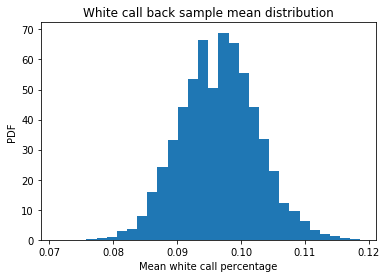

In [9]:
# Your solution to Q3 here

from statsmodels.stats.proportion import proportions_ztest as pz

prob_w = w.call[w.call == 1].sum()/len(w.call)
prob_b = b.call[b.call == 1].sum()/len(b.call)

w_call_count = w.call[w.call == 1].sum()
b_call_count = b.call[b.call == 1].sum()

# calculation of margin of error (ME = z * sqrt[p(1-p)/n]) for white call rate
mar_err = 1.96 * np.sqrt(prob_w * (1 - prob_w) / len(w))
print('Margin of error:', mar_err.round(3))

# calculation of confidence interval of white calling percentage using bootstrap
def bootstrap_replicate(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

bs_replicates_w = np.empty(10000)

for i in range(10000):
    bs_replicates_w[i] = bootstrap_replicate(w.call, np.mean)
    
_ = plt.hist(bs_replicates_w, bins=30, density=True)
_ = plt.xlabel('Mean white call percentage')
_ = plt.ylabel('PDF')
_ = plt.title('White call back sample mean distribution')

boot_conf_int = np.percentile(bs_replicates_w, [2.5, 97.5])

print('Confidence interval (bootstrap):', boot_conf_int.round(3))

# bootstrap black calling percentage
bs_replicates_b = np.empty(10000)

for i in range(10000):
    bs_replicates_b[i] = bootstrap_replicate(b.call, np.mean)
    
print('Black call percentage (bootstrap):', np.percentile(bs_replicates_b, 50).round(3))

# calculation of confidence interval using frequentist statistical approach (two sample, two tail z-test)
def z_score_2s(samp_prob1, samp_std1, samp_prob2, samp_std2, n1, n2):
        return ((samp_prob1 - samp_prob2) / np.sqrt(samp_std1**2 / n1 + samp_std2**2 / n2))

print('Z-score:', z_score_2s(prob_w, w.call.std(), prob_b, b.call.std(), len(w), len(b)).round(3))

# calculation of p-value
stat, pval = pz(np.array([w_call_count, b_call_count]), np.array([len(w),len(b)]), value = 0)
print('P-value:', pval)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

<font color='blue'>
Q4. <br>
In this experiment, we are attempting to determine whether there is a statistical significant difference between the call percentage for white and black job applicants.  We start with our hypothesis statements: <br><br>
    H0: The call percentage for black and white candidates are the same. <br>
    H1: The call percentage for black and white candidates are not the same. <br><br>
To determine if there is a significant difference, we made calculations of the confidence interval using bootstrapping and the z-score and p-value. Given that the mean black call rate is .064 (outside of the 95% CI of white call back rate of [.085, .108]) and that the obtained p-value is extremely small, we can reject the null hypothesis and accept the alternative hypothesis. <br><br>

Q5. <br>
The analysis does suggest that there is a statistical difference for callback for applicants of different races; however, it does not mean it is the most significant factor.  It is possible that other factors may be a bigger predictor of callback success.  To determine if this is true, one can repeat the calculations in question 3 for other factors.
</font>